# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [3]:
import lut

lut - operacje jednoargumentowe


Wyświetl przykładowe przekodowanie wykorzystując funkcję plt.plot(lut.kwadratowa).

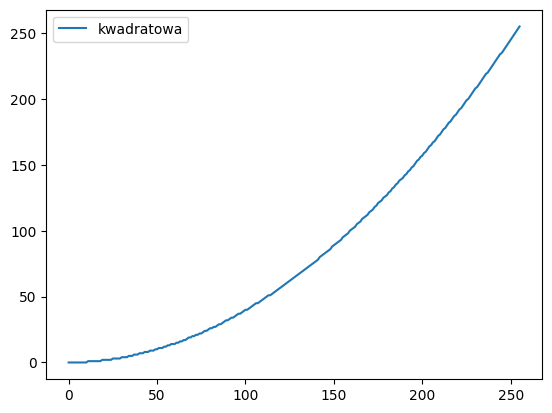

In [4]:
plt.plot(lut.kwadratowa)
plt.legend(['kwadratowa'])
plt.show()

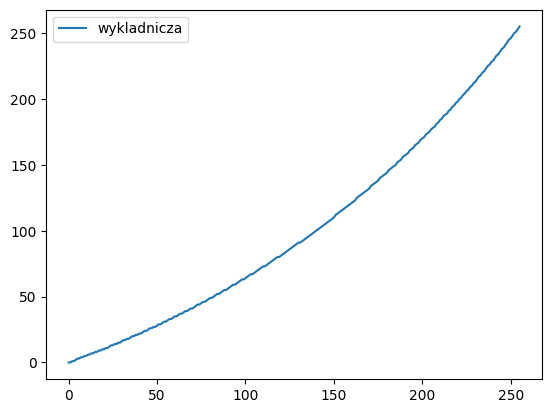

In [5]:
plt.plot(lut.wykladnicza)
plt.legend(['wykladnicza'])
plt.show()

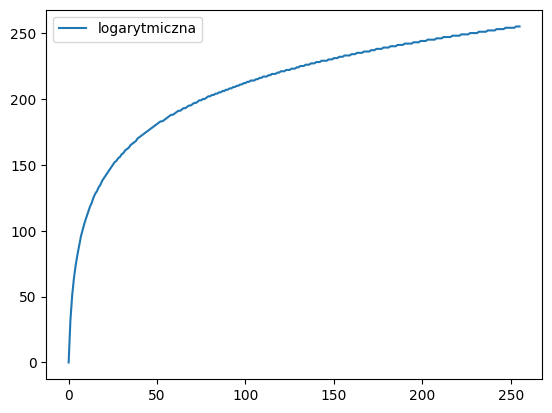

In [6]:
plt.plot(lut.log)
plt.legend(['logarytmiczna'])
plt.show()

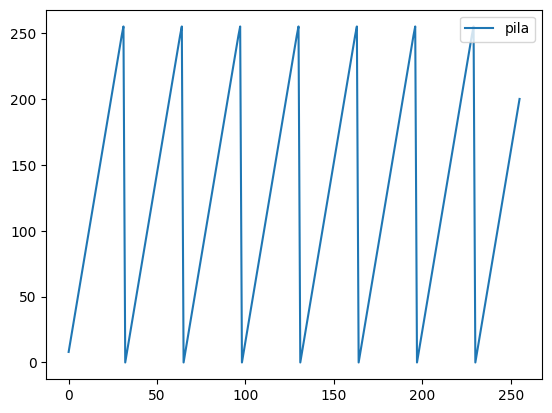

In [7]:
plt.plot(lut.pila)
plt.legend(['pila'])
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [8]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

Operacja LUT (ang. Lookup Table, czyli tablica przekodowania) jest techniką służącą do modyfikacji wartości pikseli obrazu. LUT działa w taki sposób, że dla każdego piksela obrazu, jego wartość zostaje zmieniona zgodnie z wcześniej zdefiniowaną tablicą (LUT). Można to interpretować jako mapowanie starych wartości pikseli na nowe, zgodnie z określoną transformacją, np. korekcją gamma, zmianą kontrastu, efektem kwadratowym, funkcją piłokształtną, itd.



In [9]:
fileName = 'jet.bmp'

In [10]:
img = cv2.imread(fileName)

In [11]:
img_lut = cv2.LUT(img, lut.log)

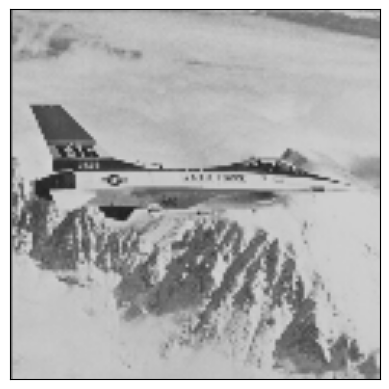

In [12]:
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [21]:
def LUT(img: np.ndarray, table: list, name: str) -> None: #1 , 2
    lut_img = cv2.LUT(img, table) #3
    fig, axs = plt.subplots(1, 3, figsize=(15, 5),constrained_layout=True) #wyświetlnenie 3 obrazow obok siebie

    #wykres przekodowania
    axs[0].plot(table)
    axs[0].set_title(name)

    #obraz oryginalny
    axs[1].imshow(img)
    axs[1].set_title("Orygianelny")

    #Obraz przekształcony
    axs[2].imshow(lut_img)
    axs[2].set_title("Przekształcony")


    fig.tight_layout()
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

<ipython-input-21-5be8bf19c7c1>:18: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


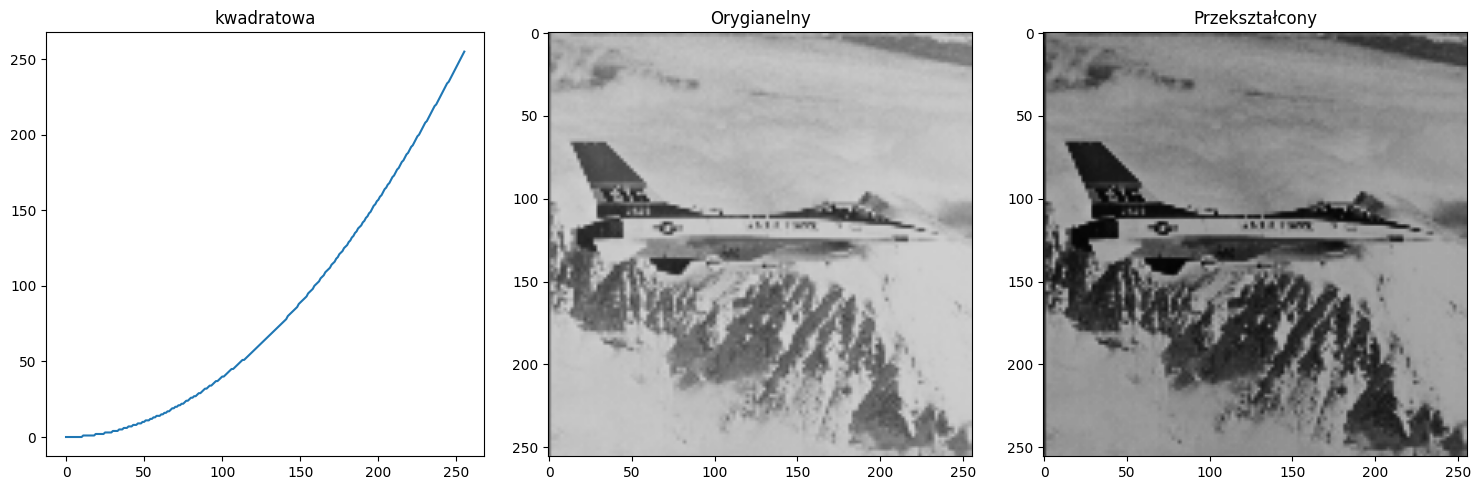

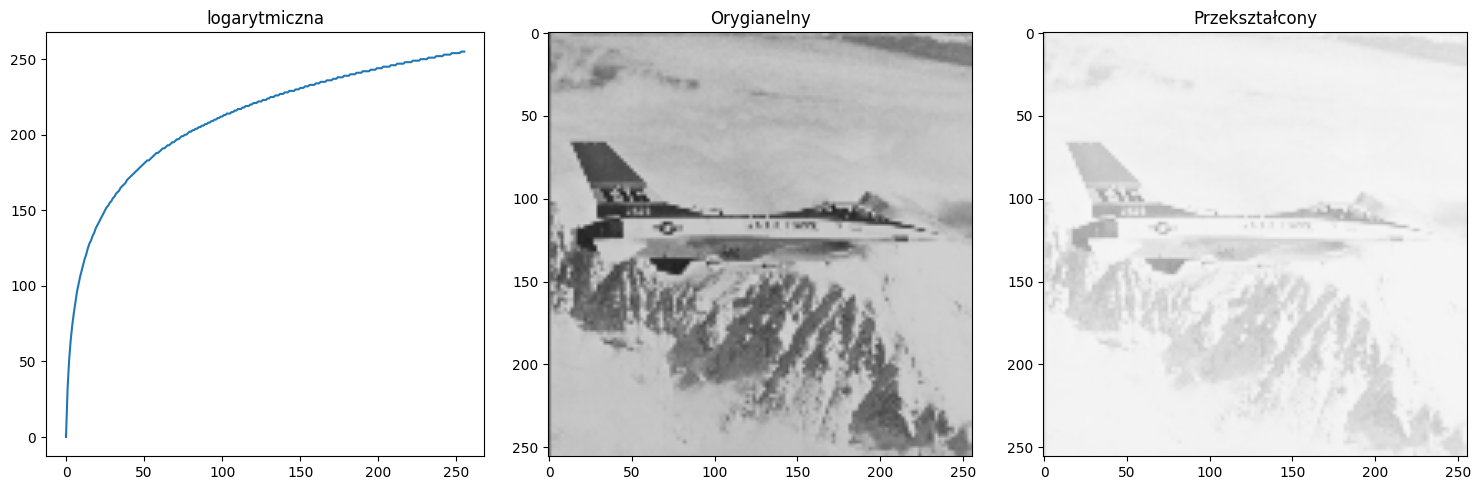

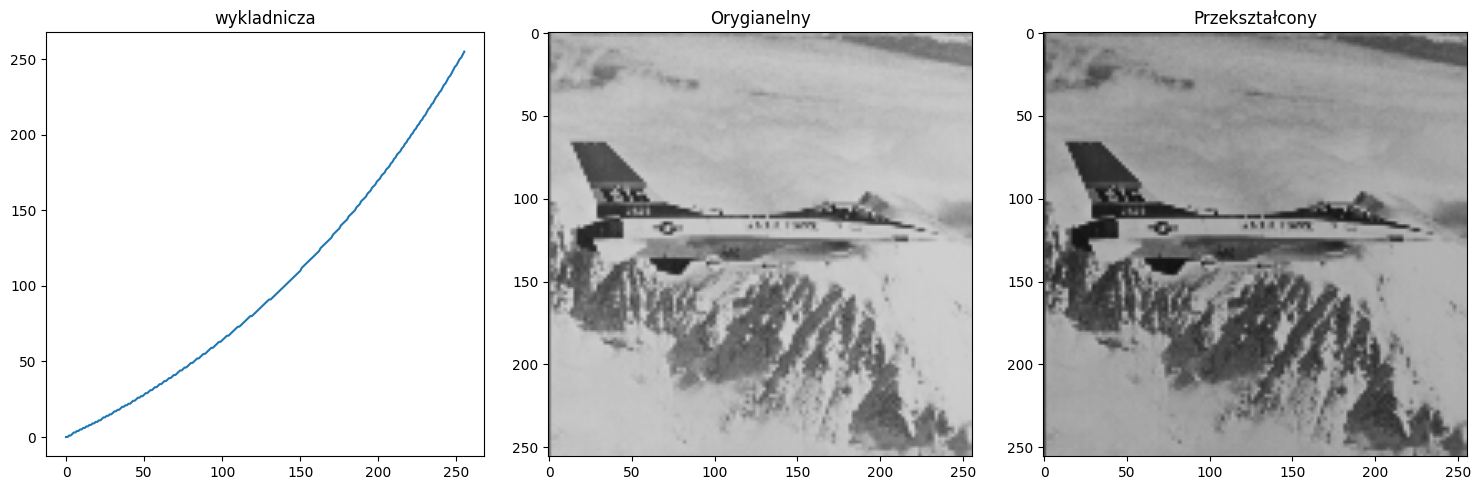

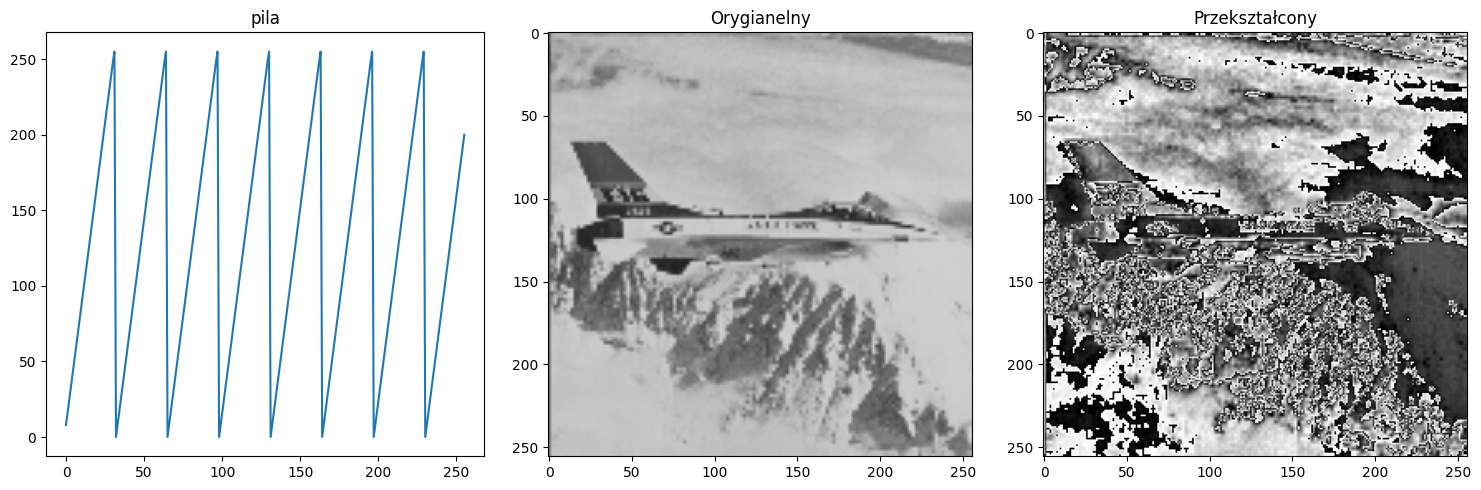

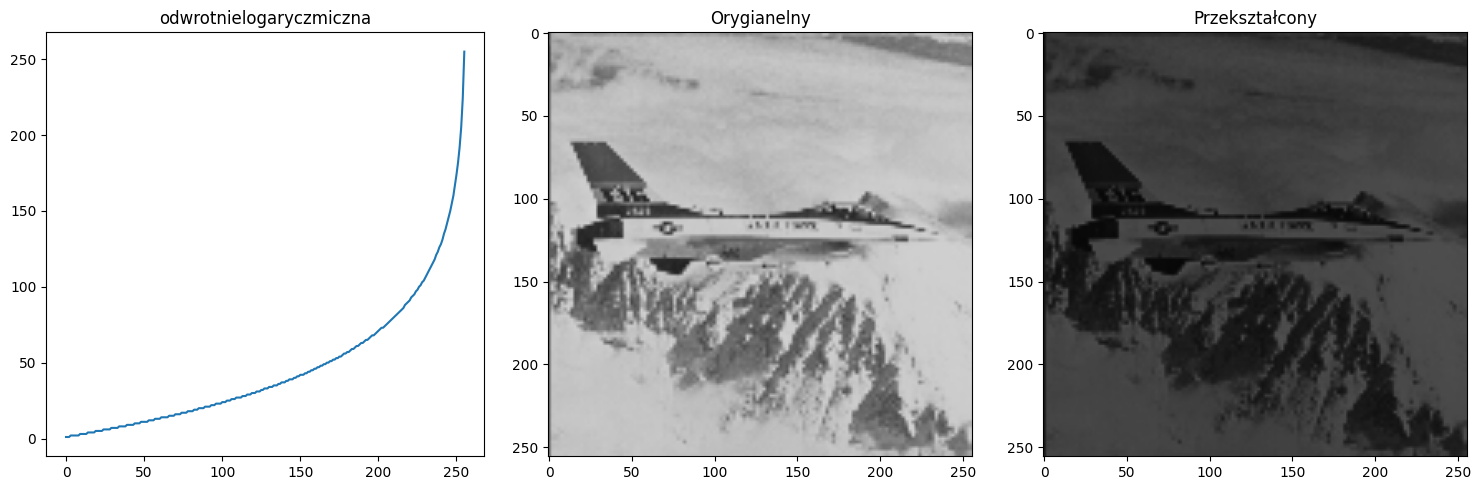

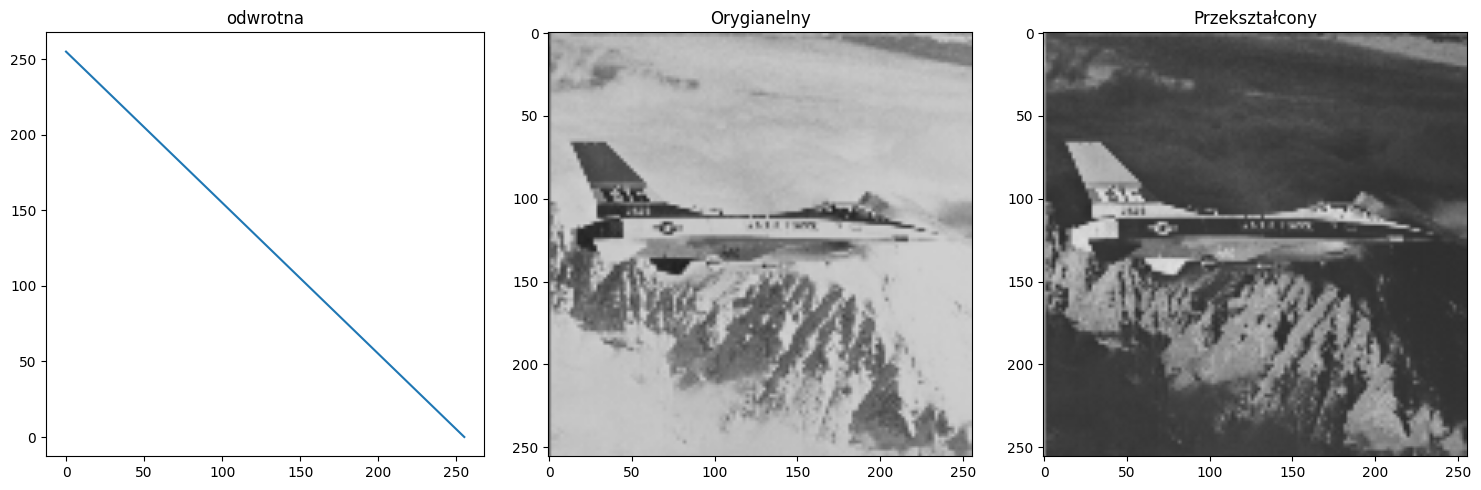

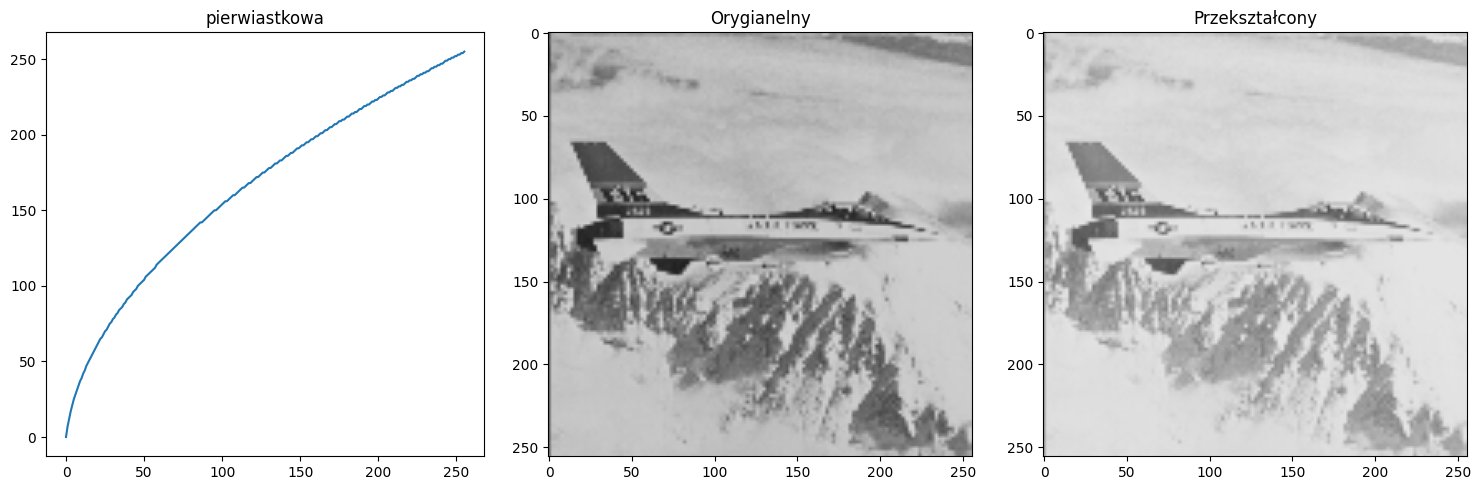

In [22]:
LUT(img, lut.kwadratowa, 'kwadratowa') #1
LUT(img, lut.log, 'logarytmiczna') #2
LUT(img, lut.wykladnicza, 'wykladnicza') #3
LUT(img, lut.pila, 'pila') #4
LUT(img, lut.odwlog, 'odwrotnielogaryczmiczna') #5
LUT(img, lut.odwrotna, 'odwrotna') #6
LUT(img, lut.pierwiastkowa, 'pierwiastkowa') #7

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

In [23]:
#Wczytanie
img1 = cv2.imread('lena.bmp')
img2 = cv2.imread('jet.bmp')

<ipython-input-24-dbea4cef942e>:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


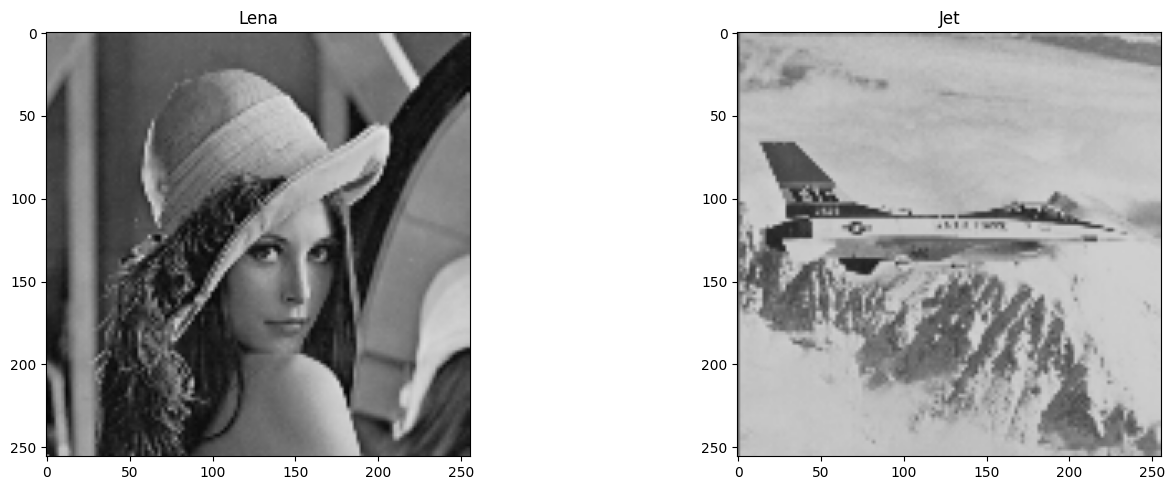

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5),constrained_layout=True)
axs[0].imshow(img1)
axs[0].set_title("Lena")

axs[1].imshow(img2)
axs[1].set_title("Jet")

fig.tight_layout()
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

In [25]:
img_add = cv2.add(img1, img2)

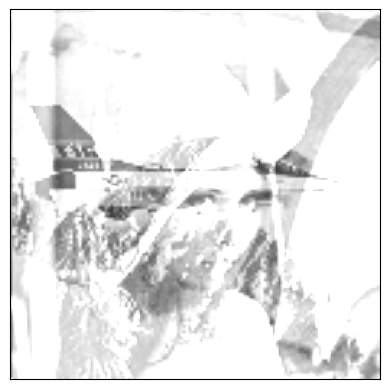

In [26]:
plt.imshow(img_add)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

In [34]:
img_add_unit = cv2.add(img1.astype('uint16'), img2.astype('uint16'))

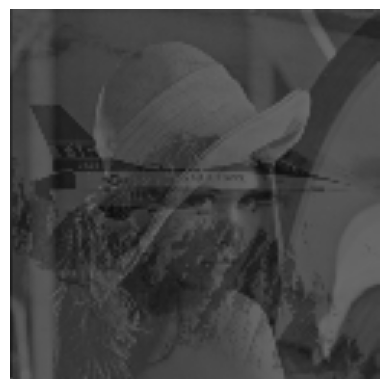

In [36]:
img_add_unit = (img_add_unit/2).astype('uint8') #przeskalowanie na unit8
plt.axis('off')
plt.imshow(img_add_unit)

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

cv2.addWeighted(src1, alpha, src2, beta, gamma)
* src1: Pierwszy obraz (np. img1), który chcesz dodać do drugiego obrazu.
* alpha: Waga pierwszego obrazu, określająca, jak bardzo obraz src1 ma wpływ na wynik. Jest to współczynnik skalujący dla src1.
* src2: Drugi obraz (np. img2), który chcesz dodać do pierwszego obrazu.
* beta: Waga drugiego obrazu, określająca, jak bardzo obraz src2 ma wpływ na wynik. Jest to współczynnik skalujący dla src2.
* gamma: Stała dodana do obrazu po połączeniu (offset). Może być używana do zwiększenia lub zmniejszenia jasności wynikowego obrazu.


In [41]:
img_add_weighted = cv2.addWeighted(img1, 0.1, img2, 0.9, 1)

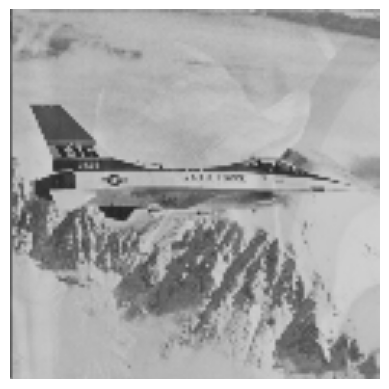

In [42]:
plt.axis('off')
plt.imshow(img_add_weighted)

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

In [43]:
img_sub = cv2.subtract(img1, img2)

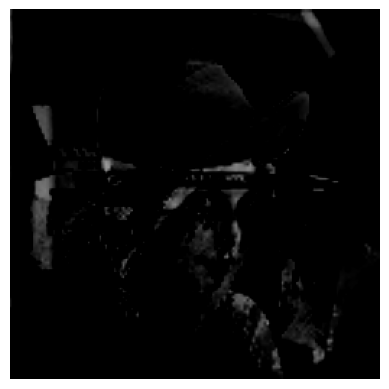

In [44]:
plt.axis('off')
plt.imshow(img_sub)

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

In [45]:
img_sub_unit = cv2.subtract(img1.astype('int16'), img2.astype('int16'))

In [46]:
img_sub_unit = np.abs(img_sub_unit).astype('uint8')

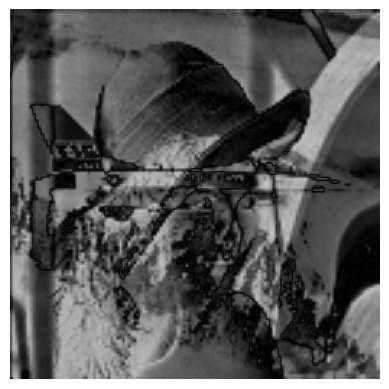

In [47]:
plt.axis('off')
plt.imshow(img_sub_unit)

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

In [48]:
img_multiply = cv2.multiply(img1.astype('float64'), img2.astype('float64'))

In [49]:
img_multiply = (img_multiply/255).astype('uint8')

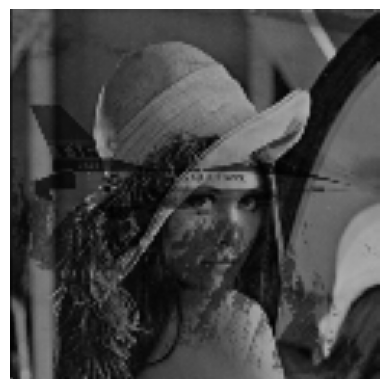

In [50]:
plt.axis('off')
plt.imshow(img_multiply)

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [51]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [52]:
img_mask = cv2.imread('kolo.bmp')

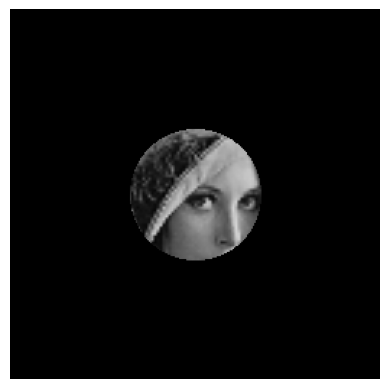

In [53]:
img_mask = cv2.multiply(img_mask.astype('bool').astype('uint8'), img1)
plt.axis('off')
plt.imshow(img_mask)

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

In [54]:
img_not = cv2.bitwise_not(img1)

In [55]:
lut_img_not = cv2.LUT(img1, lut.odwrotna)

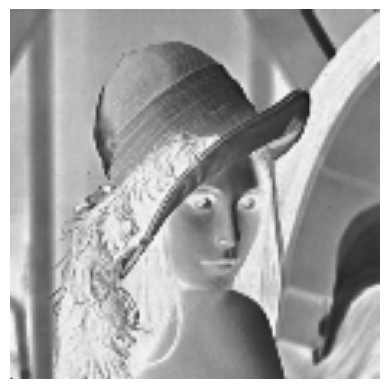

In [56]:
plt.axis('off')
plt.imshow(img_not)

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [57]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [58]:
img_circle = cv2.imread('kolo.bmp')
img_square = cv2.imread('kwadrat.bmp')

<ipython-input-62-20576042a2ef>:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


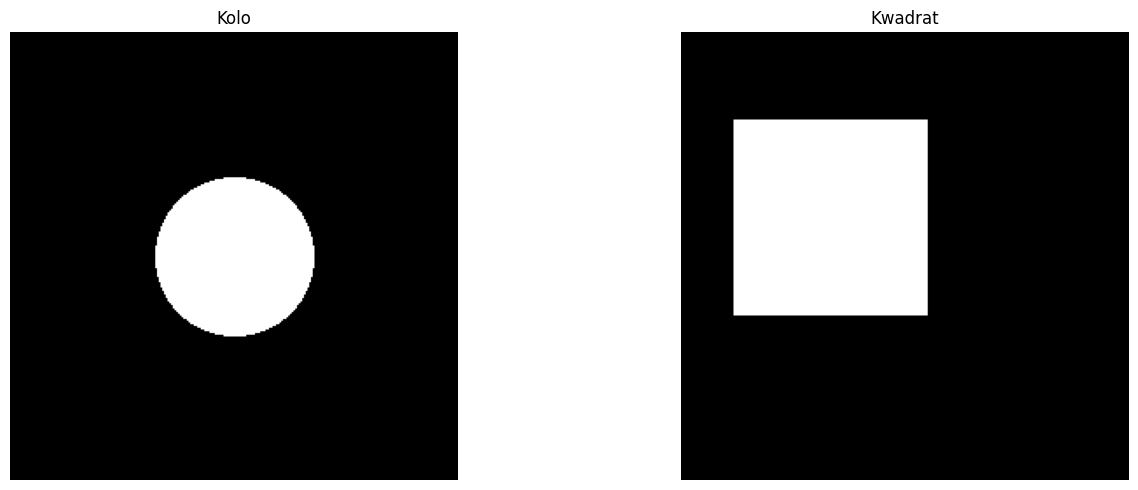

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5),constrained_layout=True)

axs[0].imshow(img_circle)
axs[0].set_title("Kolo")
axs[0].axis('off')

axs[1].imshow(img_square)
axs[1].set_title("Kwadrat")
axs[1].axis('off')

fig.tight_layout()
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

In [61]:
img_circle_not = cv2.bitwise_not(img_circle)
img_square_not = cv2.bitwise_not(img_square)

<ipython-input-64-2d19140b2ae5>:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


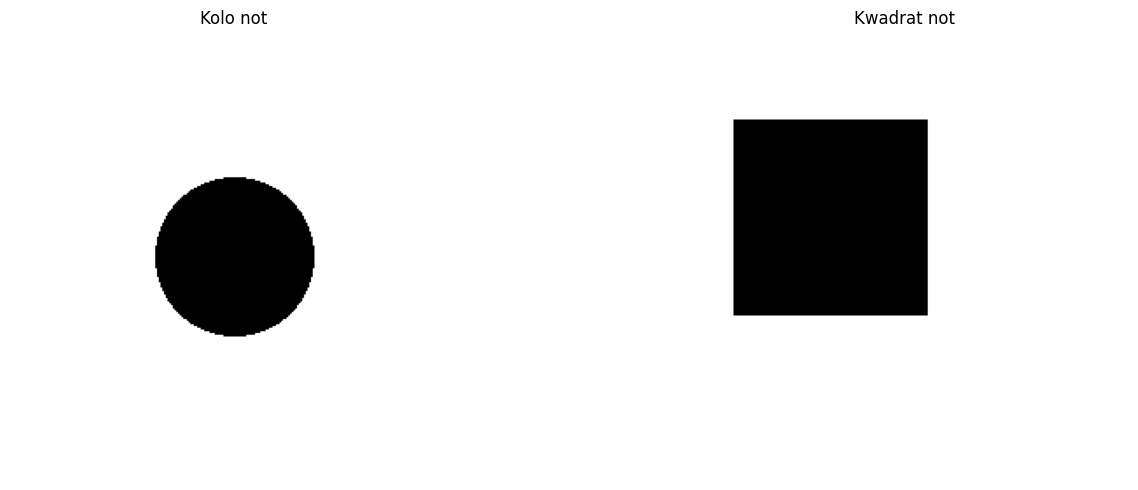

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5),constrained_layout=True)

axs[0].imshow(img_circle_not)
axs[0].set_title("Kolo not")
axs[0].axis('off')

axs[1].imshow(img_square_not)
axs[1].set_title("Kwadrat not")
axs[1].axis('off')

fig.tight_layout()

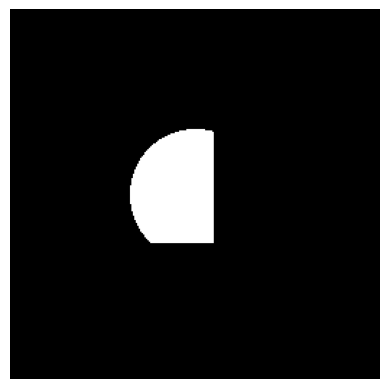

In [65]:
img_circle_and_square = cv2.bitwise_and(img_circle, img_square)
plt.axis('off')
plt.imshow(img_circle_and_square)

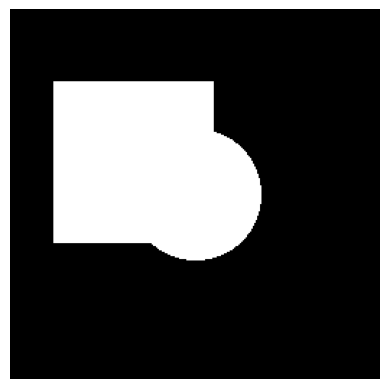

In [66]:
img_circle_or_square = cv2.bitwise_or(img_circle, img_square)
plt.axis('off')
plt.imshow(img_circle_or_square)

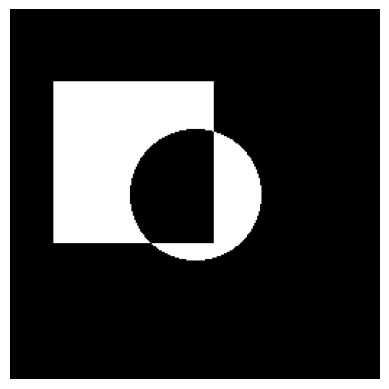

In [67]:
img_circle_xor_square = cv2.bitwise_xor(img_circle, img_square)
plt.axis('off')
plt.imshow(img_circle_xor_square)


Operacja XOR (ang. exclusive OR, czyli "wyłączna alternatywa") jest jedną z podstawowych operacji logicznych w informatyce. Działa na dwóch wartościach logicznych (binarnych), zwykle oznaczanych jako 0 i 1, i zwraca wartość 1 tylko wtedy, gdy dokładnie jedna z tych wartości jest równa 1. W przeciwnym wypadku (gdy obie wartości są takie same, czyli 0 i 0 lub 1 i 1) zwraca 0.